# Assignment 1

## Data cleaning
- Read in and merge the two data sets (tip: think of different CSV formats that exist)
- Clean the data: remove impossible values
- Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure. 
- Show the head() of the resulting data frame

In [159]:
import seaborn as sns #this is the plotting library
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

stepsdf = pd.read_csv('steps.csv', delimiter = ';')
stepsdf.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
metadf = pd.read_csv('survey.csv')
print(metadf)


      id         city  gender    age  hh_size  education          education_1  \
0      1     Bordeaux    Male  25-34        4          4  Master or doctorate   
1      2        Lille    Male  35-44        1          3             Bachelor   
2      3  Montpellier    Male  25-34        2          2  Master or doctorate   
3      4         Lyon    Male    <25        1          1             Bachelor   
4      5  Montpellier  Female  25-34        3          4             Bachelor   
..   ...          ...     ...    ...      ...        ...                  ...   
924  925        Lille  Female  45-54        3          4  Master or doctorate   
925  926        Lille    Male    <25        3          5             Bachelor   
926  927  Montpellier    Male  35-44        2          2             Bachelor   
927  928        Lille  Female  55-64        1          1          High school   
928  929         Lyon    Male  25-34        2          2          High school   

     height  weight  
0    

Drop all missing values of this table because for the categorial variables
#education
#gender
#city
#age

In [161]:
pd.value_counts(metadf["gender"]) #doesnt need cleaning

Male      494
Female    435
Name: gender, dtype: int64

In [162]:
pd.value_counts(metadf["city"]) #neither



Lille          505
Montpellier    153
Lyon           142
Bordeaux       129
Name: city, dtype: int64

In [163]:
pd.value_counts(metadf["education"])

2    333
4    287
1    234
5     39
3     36
Name: education, dtype: int64

In [164]:
pd.value_counts(metadf["education_1"]) #no degree is missing in the "numeric" variable 

Master or doctorate    412
Bachelor               357
High school            106
Vocational              40
Primary                 13
No degree                1
Name: education_1, dtype: int64

In [165]:
stepmeta = pd.merge(stepsdf, metadf, on = 'id') #id is the key for the tables
stepmeta.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


Variables to clean:
#weight
#height
#adding hh_size

What does hh_size? Looked it up in the original study:
https://pubmed.ncbi.nlm.nih.gov/29084709/#:~:text=The%20most%20important%20determinants%20are,related%20aspects%20of%20activity%20trackers.

-> Houshold Size (Number of people, who live in a household)


In [166]:
print(stepmeta['weight'].describe())

count    927.000000
mean      72.833873
std       25.902717
min        6.000000
25%       61.000000
50%       71.000000
75%       81.000000
max      700.000000
Name: weight, dtype: float64


The min and max shows that there are some values that are not realistic.
For weight the assumption has been made that a person weights less than 635kg because the heaviest man ever weighted that.
And for the minimum is nessacary to look which data point are actually realistic.

To calculate the BMI is one Indicator to see if a weight is unrealistic in relation to the weight for the lower values.
Calculate the BMI with the Fomular: 

$BMI = weight/height²$

A Score under 13 is impossible. Thus remove the weight for that column.



In [167]:
stepmeta['BMI'] = (stepmeta['weight'])/((stepmeta['height']/100)*(stepmeta['height']/100))

print(stepmeta)

      id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0      1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1      2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2      3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3      4        NaN        NaN        NaN        NaN        NaN        NaN   
4      5        NaN        NaN        NaN        NaN        NaN        NaN   
..   ...        ...        ...        ...        ...        ...        ...   
924  925        NaN     4571.0    10471.0     5899.0    15295.0     9178.0   
925  926        NaN        NaN        NaN        NaN        NaN        NaN   
926  927        NaN        NaN        NaN     1623.0        NaN        NaN   
927  928        NaN        NaN    14411.0    14364.0    26629.0    13092.0   
928  929        NaN     3324.0     4507.0    14364.0     4098.0     7299.0   

     26-6-2013  27-6-2013  28-6-2013  ...  13-5-2014         ci

In [168]:
#remove values over 635
#remove the weight for columns that have a BMI under 13

for id in range(len(stepmeta)):
    if stepmeta['BMI'].loc[id] <13: 
        print(stepmeta['weight'].loc[id])
        stepmeta['weight'].loc[id] = None
    elif stepmeta['weight'].loc[id] >= 400:
        print(stepmeta['weight'].loc[id])
        stepmeta['weight'].loc[id] = None

700.0
6.0
20.0


C:\Users\mirih\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Doing the same thing with height:


In [169]:
print(stepmeta['height'].describe())

count    928.000000
mean     171.668103
std        9.080235
min      145.000000
25%      165.000000
50%      172.000000
75%      179.000000
max      195.000000
Name: height, dtype: float64


C:\Users\mirih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


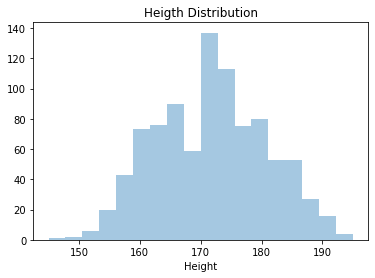

In [170]:
sns.distplot(stepmeta['height'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Heigth Distribution')
plt.xlabel('Height')
plt.show()

The height looks pretty realistic.
Do the same thing for hh_size

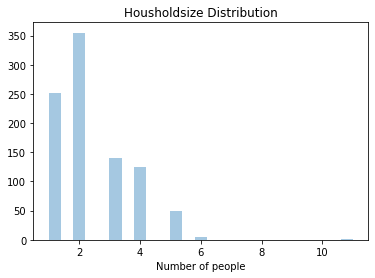

In [171]:
sns.distplot(stepmeta['hh_size'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Housholdsize Distribution')
plt.xlabel('Number of people')
plt.show()

In [172]:
#Create the variable mean steps per participant:
stepmeta['spd_mean'] = stepmeta.loc[:,'20-6-2013':'13-5-2014'].mean(axis=1)

#print this dataframe
stepmeta.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,BMI,spd_mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,30.930438,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,23.765432,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,25.617284,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,25.249337,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,21.872423,5312.129630


With this methode we treate the NaN as nonexistent because we dont know what happens there. 
However, people could have the tendency to do more steps when they putting on their wrist (because it motivates them)
or putting the wrist on for days with higher tendency for walking around.
This could lead to a distortion. An alternative would be to replace the values with a 0, which again would lead to a massive distortion.
This bias should be taken into account in the interpretation, because if this applies it is more likely that the average number of steps is overestimated rather than underestimated. 

## Exploratory data analysis
- An analysis of mean steps per participant:
- Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)
- Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
- Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.

Can plot the new variable spd_mean ('Stepsperday_mean) in a histogram with mean and median of the variable:

C:\Users\mirih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


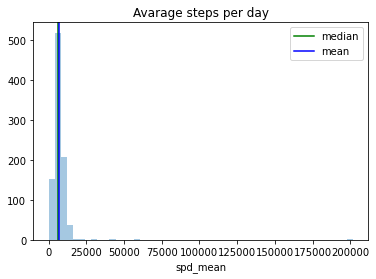

In [173]:
mean_spd = stepmeta['spd_mean'].mean()
median_spd = stepmeta['spd_mean'].median()


sns.distplot(stepmeta['spd_mean'], kde=False)
plt.title('Avarage steps per day')
plt.axvline(median_spd, 0, 100, color='green', label='median') #vertical line for the median
plt.axvline(mean_spd, 0, 100, color='blue', label='mean') #same for the mean
plt.legend() #legend of median and mean
plt.show()

The data showed a outliner around 200 000 steps per day. That is unrealistic. Let's get ride of those. 250 00 are approx. 19-20km depeding on step lenght, which is even incredible much for a avarage per day, thus I will remove every id that has a score over that value. 
. Note: For interpretation purposes: Every results then only applies for people that walk less than 250 00 Steps per Day.

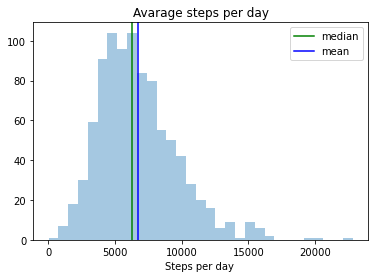

In [174]:
stepmeta = stepmeta[stepmeta['spd_mean']<25000]

mean_spd = stepmeta['spd_mean'].mean()
median_spd = stepmeta['spd_mean'].median()

sns.distplot(stepmeta['spd_mean'], kde=False)
plt.title('Avarage steps per day')
plt.xlabel('Steps per day ')
plt.axvline(median_spd, 0, 100, color='green', label='median') #vertical line for the median
plt.axvline(mean_spd, 0, 100, color='blue', label='mean') #same for the mean
plt.legend() #legend of median and mean
plt.show()

In [175]:

count_id = stepmeta ['spd_mean'].count()
print(count_id)
print(mean_spd)
print(median_spd)

921
6703.996351176375
6240.073033707865


C:\Users\mirih\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


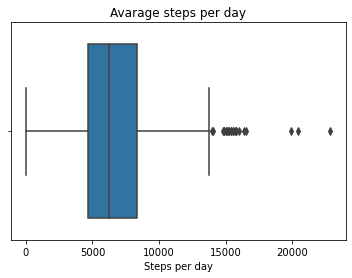

In [176]:
sns.boxplot(stepmeta ['spd_mean'])
plt.title('Avarage steps per day')
plt.xlabel('Steps per day')
plt.show()

In [177]:
stepsd = stepmeta ['spd_mean'].std()
stepvariance = stepmeta ['spd_mean'].var()
print(stepvariance)
print(stepsd)



8694607.658147227
2948.662011514244


With a sample of $n = 921$ $(Mdn=6240.07; SD= 2948.66)$ we can see a right-skewed distribution (median is lower than mean). Where most of the people make around approx. 5000-8000 steps per day with some outliers that do a lot more steps (Note: Everything over 25 000 were filtered out, without that meassures the mean would be even higher) 

# Nominal Variables
- The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)
- Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
- Describe and interpret the results

- See last week for the first part (distribution of steps). In addition:
- Make a scatterplot matrix of the numerical variables
- Make a correlation matrix of the numerical variables
- Describe and interpret the results

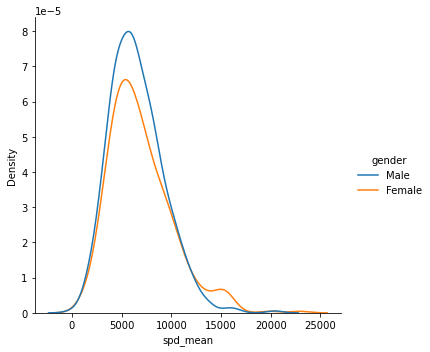

In [178]:
sns.displot(data = stepmeta, x = 'spd_mean', hue ='gender', kind = 'kde')

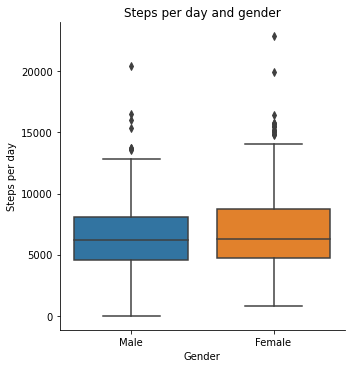

In [179]:
sns.catplot(x='gender', y='spd_mean',kind ='box', data=stepmeta)
plt.title('Steps per day and gender')
plt.xlabel('Gender')
plt.ylabel('Steps per day')
plt.show()

We can see a difference in both groups: The Variance of the female group is larger, the reason could be the higher outliers for these group that we can see in the boxplot but as we can see in the first graph it is a minority of women that have in avarage more steps than the other ones, that don't occur for the male group. 
However, the difference in the boxplot is maginal and I would do a t-test to to see if the difference is significant, but for now it looks like just a higher variance for the female group.
Which means, the average steps for men and women don't differ significantly.

Redo the same thing for education
(but have to get ride of the no degree person first)

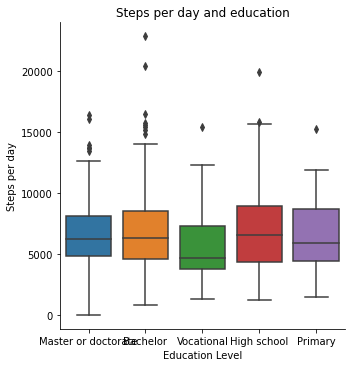

In [180]:
stepmeta = stepmeta[stepmeta['education_1']!='No degree']

sns.catplot(x='education_1', y='spd_mean',kind ='box', data=stepmeta)
plt.title('Steps per day and education')
plt.xlabel('Education Level')
plt.ylabel('Steps per day')
plt.show()

Text(0.5, 1.0, 'Steps per day per education')

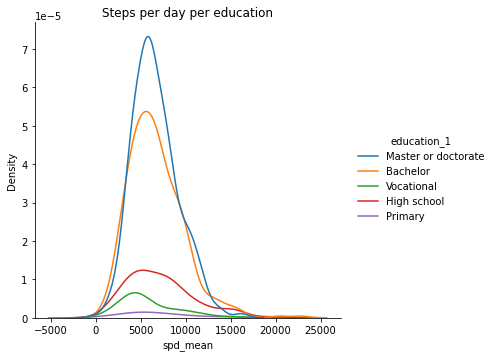

In [181]:
sns.displot(data = stepmeta, x = 'spd_mean', hue ='education_1', kind = 'kde')
plt.title('Steps per day per education')


We can see that the groups differ in their variance and density. I am not sure how to intreprete this. 

## Predictive model
- Explain linear regression in your own words: 

*A simple linear regression tries to provide a linear model/function for a relationship between a predictor (undependent variable) and a response (dependent variable), which can, if a linear model fits for the coherence of both variables, predict values of the other variable with a certain probability.*


- Create dummy variables for the categorical variables

In [182]:
stepmeta = pd.get_dummies(stepmeta, columns = ['gender'])
stepmeta = pd.get_dummies(stepmeta, columns = ['education_1'])
stepmeta = pd.get_dummies(stepmeta, columns = ['age'])
stepmeta = pd.get_dummies(stepmeta, columns = ['city'])

stepmeta.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25,city_Bordeaux,city_Lille,city_Lyon,city_Montpellier
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,1,0,0,0,0,0,1,0,0,0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0,1,0,0,0,0,0,1,0,0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1,0,0,0,0,0,0,0,0,1
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,1


- Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).


## Assign all independent variables to X 
including the dummy varibles -1 for each category (There is certainly a more mathematical way to express this).

Got an error for missing values, filled the missing values with 0 with .fillna(0), that everything is a number, 
but I am sure that there has to be a better way because 0 is not the same as not existend and could influence the results.

## Assign the response variabel to y


In [183]:
X = stepmeta[['BMI', 'education_1_High school', 'education_1_Master or doctorate','education_1_Primary', 'education_1_Vocational', 'age_25-34', 'age_35-44', 'age_45-54', 'age_55-64', 'age_65+', 'gender_Male', 'hh_size', 'city_Bordeaux', 'city_Lyon', 'city_Montpellier']].fillna(0)
y = stepmeta['spd_mean']

Divide Data set into training and test data with an 70/30 split, because further research/experience
showed that this is a good proportion.

In [184]:
from sklearn.model_selection import train_test_split #this is the function we need to split the data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) #splits the data into train (70%) and test (30%) data

import libaries for linear models

In [185]:
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [186]:
lm = LinearRegression() #create a new (empty model)
lm = lm.fit(x_train, y_train) #fit the model WITH THE TRAIN DATA ONLY

#That exactly like in the example notebook

Calculate how much (the factor) a the individual predictors influences y in the calculated model. 

In [187]:
y_test_p = lm.predict(x_test) #Generate the predictions and store them in y_test_p. USE ONLY THE TEST DATA HERE

## Evaluation
- Evaluate the model on the test data
- Predictive power of the model (R2, RMSE)
- Investigate the residuals
- Describe and interpret the results

Calculate the Squared Residuals for X and y using the test data (new data see overfitting etc.)

In [188]:
r2_score(y_test, y_test_p) #this gives the model fit (R2) for the Y and predicted Y

0.03406417522299976

The R^2 is 0.034, which means 3,4% of the variation in avarage steps can be explained by the model.
That's bad but no surprise because, every this are a lot of independent variables.

In [189]:
math.sqrt(mean_squared_error(y_test, y_test_p)) #this gives the model fit (R2) for the Y and predicted Y

2863.2605654700983

The RSME gives us 2863,26 steps which is not better than the prediction based alone on the distribution of steps and SD, which means also means that this model is pretty poor.